In [2]:
import surface_code_opt as sc
import matplotlib.pyplot as plt

In [3]:
physical_error_rate = 1e-4
clock_cycle_time = 1e-6
max_physical_qubits = 50000000

# setting of HHl
# kappa = 
epsilon = 0.01
precision = 5
start = 10
end = 60

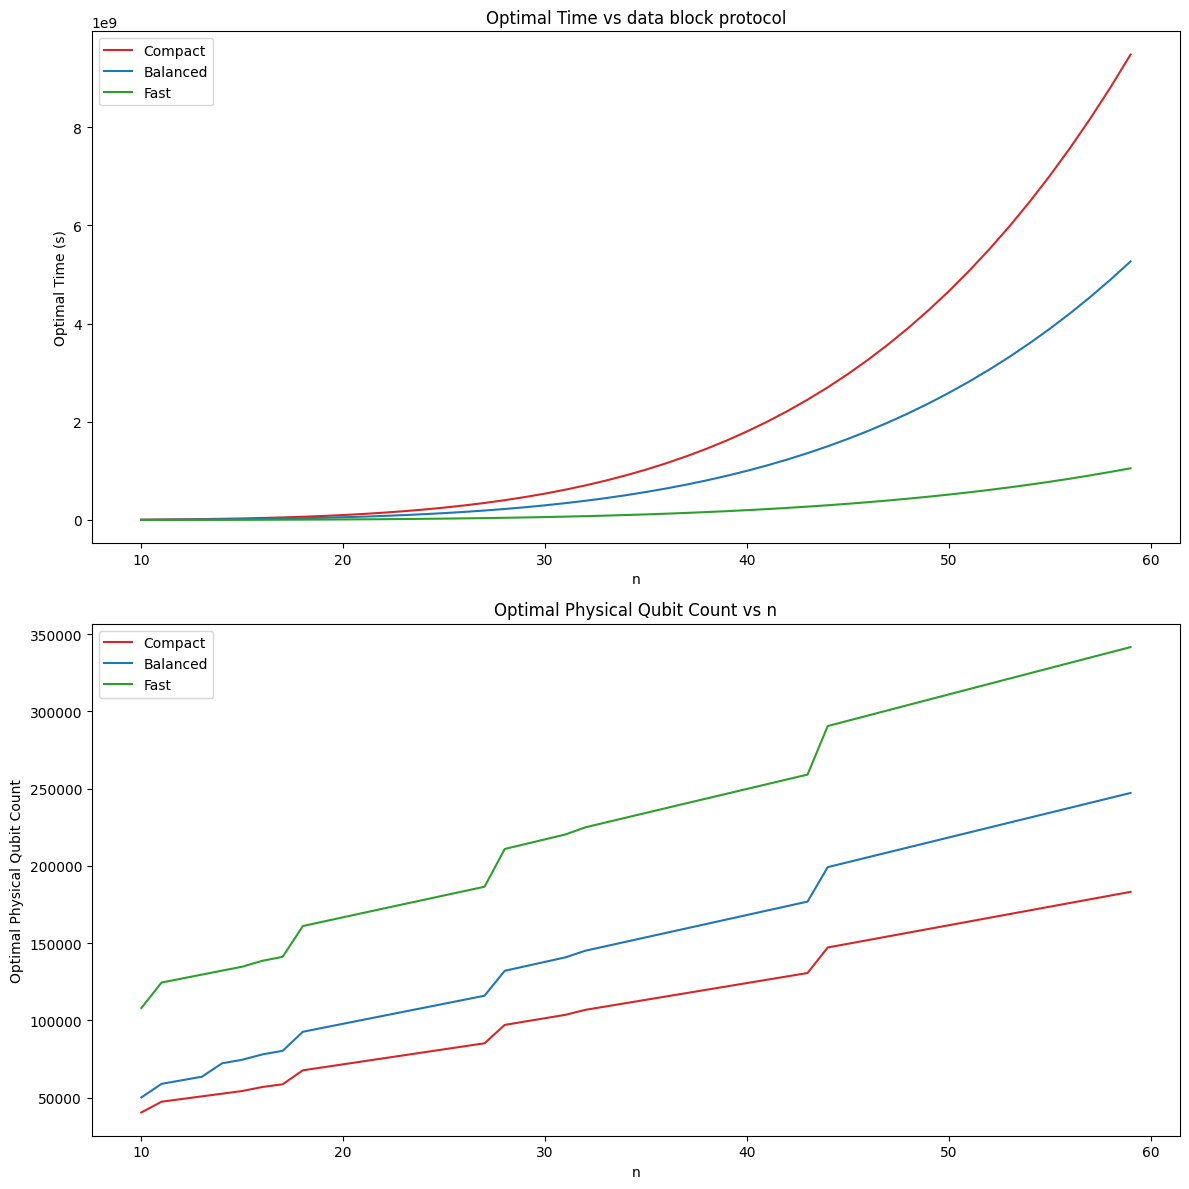

In [4]:
opt_dist_block_counts_0 = []
opt_data_protos_0 = []
opt_time_0 = []
opt_physical_qubit_count_0 = []

opt_dist_block_counts_1 = []
opt_data_protos_1 = []
opt_time_1 = []
opt_physical_qubit_count_1 = []

opt_dist_block_counts_2 = []
opt_data_protos_2 = []
opt_time_2 = []
opt_physical_qubit_count_2 = []

for protocol in range(3):
    opt_dist_block_counts = []
    opt_data_protos = []
    opt_time = []
    opt_physical_qubit_count = []

    for n in range(start, end):
        sparsity = n 
        kappa = n 
        hhl_task = sc.HHL(n, sparsity, kappa, epsilon, precision)

        (
            optimal_distillation_block_count,
            optimal_data_protocol,
            optimal_cycle_count,
            optimal_physical_qubit_count,
        ) = sc.find_optimal_setting(
            hhl_task.t_gate_count,
            hhl_task.logical_qubit_count,
            physical_error_rate,
            max_physical_qubits,
            specify_data_protocol=protocol
        )

        opt_dist_block_counts.append(optimal_distillation_block_count)
        opt_data_protos.append(optimal_data_protocol)
        opt_time.append(optimal_cycle_count * clock_cycle_time)
        opt_physical_qubit_count.append(optimal_physical_qubit_count)

    if protocol == 0:
        opt_dist_block_counts_0 = opt_dist_block_counts
        opt_data_protos_0 = opt_data_protos
        opt_time_0 = opt_time
        opt_physical_qubit_count_0 = opt_physical_qubit_count
    elif protocol == 1:
        opt_dist_block_counts_1 = opt_dist_block_counts
        opt_data_protos_1 = opt_data_protos
        opt_time_1 = opt_time
        opt_physical_qubit_count_1 = opt_physical_qubit_count
    else:
        opt_dist_block_counts_2 = opt_dist_block_counts
        opt_data_protos_2 = opt_data_protos
        opt_time_2 = opt_time
        opt_physical_qubit_count_2 = opt_physical_qubit_count

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot optimal time for all protocols
ax1.plot(range(start, end), opt_time_0, color="tab:red", label="Compact")
ax1.plot(range(start, end), opt_time_1, color="tab:blue", label="Balanced")
ax1.plot(range(start, end), opt_time_2, color="tab:green", label="Fast")
ax1.set_xlabel("n")
ax1.set_ylabel("Optimal Time (s)")
ax1.set_title("Optimal Time vs data block protocol")
ax1.legend()

# Plot optimal physical qubit count for all protocols
ax2.plot(range(start, end), opt_physical_qubit_count_0, color="tab:red", label="Compact")
ax2.plot(range(start, end), opt_physical_qubit_count_1, color="tab:blue", label="Balanced")
ax2.plot(range(start, end), opt_physical_qubit_count_2, color="tab:green", label="Fast")
ax2.set_xlabel("n")
ax2.set_ylabel("Optimal Physical Qubit Count")
ax2.set_title("Optimal Physical Qubit Count vs n")
ax2.legend()

plt.tight_layout()
plt.savefig("optimal_time_and_qubit_count_all_protocols.pdf")
plt.show()
